# Лабораторная 3. Линейная регрессия

## Импорт необходимых библиотек


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Загрузка данных

In [2]:
data = pd.read_csv('data/california_housing_train.csv')

## 1. Визуализируем основные статистики по датасету

In [3]:
# Описание статистики по числовым данным
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Построение графиков для визуализации данных

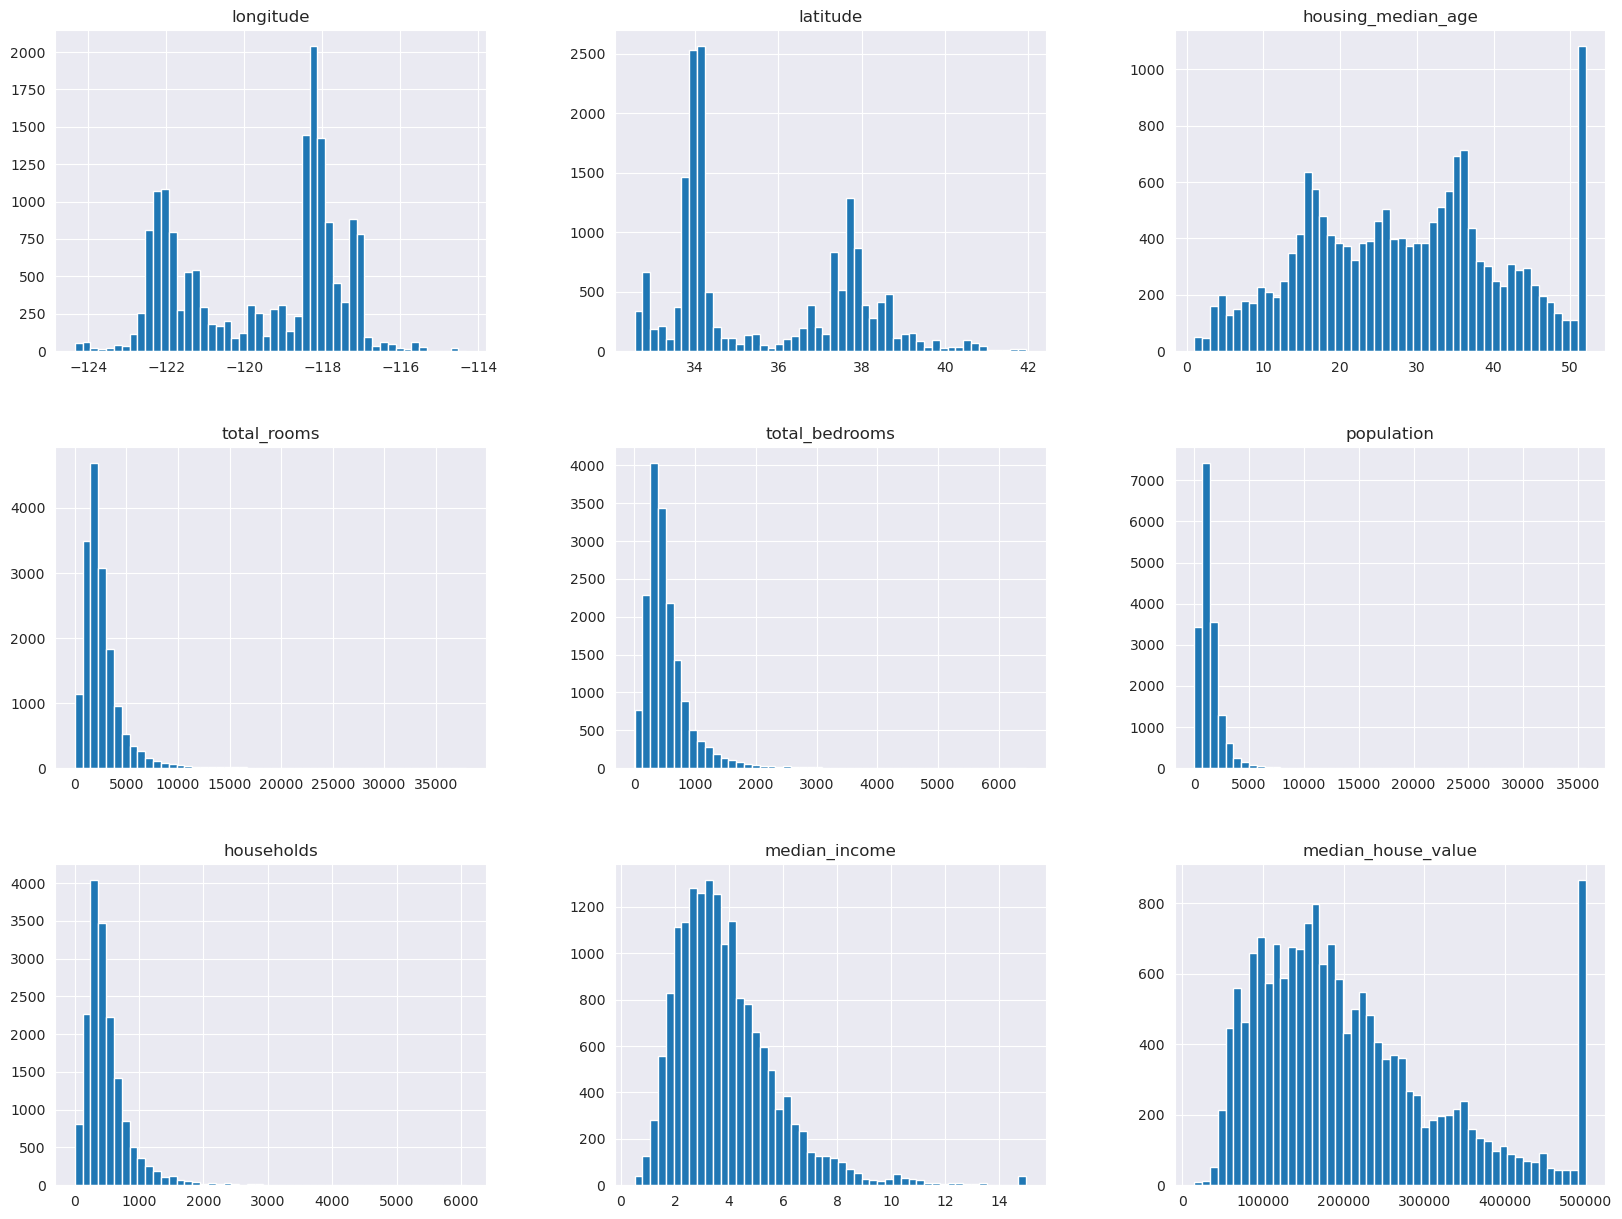

In [4]:
# Гистограммы для всех числовых признаков
data.hist(bins=50, figsize=(20,15))
plt.show()

## Корреляционная матрица для признаков

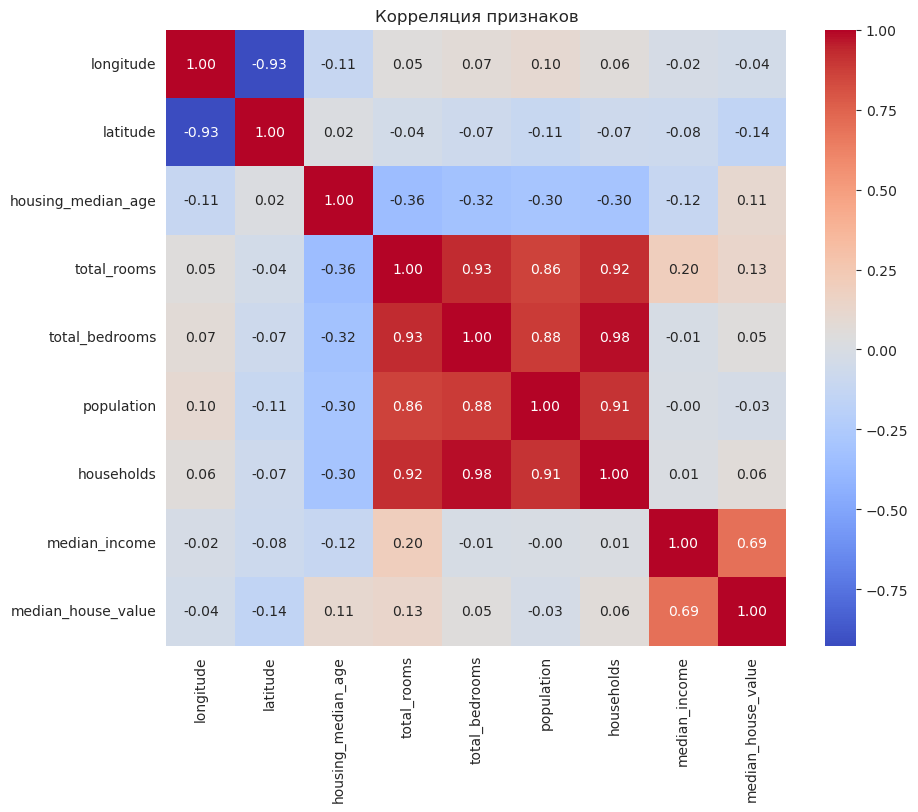

In [5]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция признаков")
plt.show()

## 2. Предварительная обработка данных

## Обработка пропущенных значений

In [6]:
## Смотрим, есть ли пропущенные значения в данных

data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## Заполняем пропущенные значения медианой

In [7]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

## Кодирование категориальных признаков 
в данном случае их нет, но если бы были, применили бы one-hot encoding
Например, если бы у нас был категориальный признак, применили бы:
data = pd.get_dummies(data, columns=['categorical_column'])

## Нормировка данных (например, Min-Max или StandardScaler)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled[data.columns] = scaler.fit_transform(data[data.columns])

data_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125
...,...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081,0.198764
16996,0.007968,0.866100,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170,0.131960
16997,0.004980,0.988310,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577,0.182682
16998,0.004980,0.984060,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054,0.145981


## 3. Разделение данных на обучающий и тестовый наборы

In [9]:
X = data_scaled.drop('median_house_value', axis=1)  # Признаки
y = data_scaled['median_house_value']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Реализация линейной регрессии без использования сторонних библиотек, кроме Pandas и NumPy

In [10]:
# Добавляем столбец 1 для модели линейной регрессии
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]

## Находим коэффициенты линейной регрессии методом наименьших квадратов

In [11]:
'''
    Коэффициенты = (X^T * X)^(-1) * X^T * Y = псевдообратная матрица
    Псевдообратную матрицу сложно и не всегда возможно посчитать
    * Если в выборке есть псевдоскорелированные признаки - можно столкнуться с проблемой мультиколлинеарности
    (проблема мультиколлинеарности - когда определитель стремится к нулю и получаемые коэффициенты получаются неустойчивые)
'''
theta = np.linalg.inv(X_train_with_intercept.T.dot(X_train_with_intercept)).dot(X_train_with_intercept.T).dot(y_train)

theta

array([ 0.73449498, -0.89977173, -0.83634774,  0.11900558, -0.691686  ,
        1.5107859 , -2.62310021,  0.56606423,  1.20170962])

## Предсказания для тестового набора

In [12]:
y_pred = X_test_with_intercept.dot(theta)

print(y_pred)

[0.26550694 0.79095874 0.14709651 ... 0.02367701 0.55372448 0.20785441]


## 5. Оценка производительности модели с использованием коэффициента детерминации (R^2)


In [13]:
from sklearn.metrics import r2_score

# коэффициент детерминации = 1 - сумма отклонений измерения с квадратом прогноза / сумма отклонений измерения со средним квадратом
r2 = r2_score(y_test, y_pred)
print(f'Коэффициент детерминации R^2: {r2:.4f}')

Коэффициент детерминации R^2: 0.6636


## 6. Построение трех моделей с различными наборами признаков

In [14]:
# Модель 1: Использование всех признаков
# Включаем все признаки и добавляем столбец перехвата (единицы) для учета смещения
X_train_1 = X_train_with_intercept  # Матрица признаков для обучения
X_test_1 = X_test_with_intercept    # Матрица признаков для тестирования

# Вычисляем параметры модели (theta) с использованием нормального уравнения
theta_1 = np.linalg.inv(X_train_1.T.dot(X_train_1)).dot(X_train_1.T).dot(y_train)

# Предсказание целевой переменной на тестовых данных
y_pred_1 = X_test_1.dot(theta_1)

# Вычисление метрики R^2 для оценки качества модели
r2_1 = r2_score(y_test, y_pred_1)

In [15]:
# Модель 2: Использование только признаков с высокой корреляцией
# Выбираем признаки с высокой корреляцией (предположительно, это заранее определенные признаки)
X_train_2 = X_train_with_intercept[:, [0, 1, 3, 7]]  # Только выбранные признаки для обучения
X_test_2 = X_test_with_intercept[:, [0, 1, 3, 7]]    # Те же признаки для тестирования

# Вычисляем параметры модели (theta) с использованием нормального уравнения
theta_2 = np.linalg.inv(X_train_2.T.dot(X_train_2)).dot(X_train_2.T).dot(y_train)

# Предсказание целевой переменной на тестовых данных
y_pred_2 = X_test_2.dot(theta_2)

# Вычисление метрики R^2 для оценки качества модели
r2_2 = r2_score(y_test, y_pred_2)

In [16]:
# Модель 3: Исключение признака latitude
# Удаляем признак latitude из данных (предполагается, что этот столбец присутствует)
X_train_3 = X_train.drop('latitude', axis=1)  # Удаление latitude из обучающей выборки
X_test_3 = X_test.drop('latitude', axis=1)    # Удаление latitude из тестовой выборки

# Добавляем столбец единиц для учета перехвата
X_train_3 = np.c_[np.ones(X_train_3.shape[0]), X_train_3]
X_test_3 = np.c_[np.ones(X_test_3.shape[0]), X_test_3]

# Вычисляем параметры модели (theta) с использованием нормального уравнения
theta_3 = np.linalg.inv(X_train_3.T.dot(X_train_3)).dot(X_train_3.T).dot(y_train)

# Предсказание целевой переменной на тестовых данных
y_pred_3 = X_test_3.dot(theta_3)

# Вычисление метрики R^2 для оценки качества модели
r2_3 = r2_score(y_test, y_pred_3)

# Итог: r2_1, r2_2 и r2_3 показывают качество каждой модели

## 7. Сравнение моделей

In [17]:
print(f'Модель 1 R^2: {r2_1:.4f}')
print(f'Модель 2 R^2: {r2_2:.4f}')
print(f'Модель 3 R^2: {r2_3:.4f}')

Модель 1 R^2: 0.6636
Модель 2 R^2: 0.0217
Модель 3 R^2: 0.5964


## 8. Бонусное задание - Создание синтетического признака

In [18]:
X_train['interaction_feature'] = X_train['longitude'] * X_train['latitude']
X_test['interaction_feature'] = X_test['longitude'] * X_test['latitude']

## Перестроим модель 1 с синтетическим признаком

In [19]:
X_train_4 = np.c_[X_train_with_intercept, X_train['interaction_feature']]
X_test_4 = np.c_[X_test_with_intercept, X_test['interaction_feature']]
theta_4 = np.linalg.inv(X_train_4.T.dot(X_train_4)).dot(X_train_4.T).dot(y_train)
y_pred_4 = X_test_4.dot(theta_4)
r2_4 = r2_score(y_test, y_pred_4)

print(f'Модель с синтетическим признаком R^2: {r2_4:.4f}')

Модель с синтетическим признаком R^2: 0.6641
